In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def select_bic(X, patiency):
    X = X.sort_values('iteration p')
    best_p = 0
    best_bic = np.inf
    no_imp = 0
    for _, x in X.iterrows():
        if x['bic'] < best_bic:
            best_bic = x['bic']
            best_p = x['iteration p']
            no_imp = 0
        else:
            no_imp += 1
            if no_imp >= patiency:
                break
    return X[X['iteration p']==best_p]
    
def select_best(results, method, patiency=1):
    method_results = results[results['method']==method]
    best_iteration_p = method_results.groupby(['p', 'run']).apply(select_bic, patiency).reset_index(drop=True)
    return best_iteration_p

def results_runtime(results, method, patience):
    best = select_best(results, method, patience)
    best['runtime'] = 0
    for idx, b in best.iterrows():
        best.loc[idx, 'runtime'] = results.loc[(results['p']==b['p']) & 
                                               (results['method']==method) &
                                               (results['run']==b['run']) & 
                                               (results['iteration p']<=b['iteration p']), 'time'].sum()
    return best

In [72]:
def plot_comparision(means, deviations, methods, title, measure, error_plt=True):
    plt.figure(figsize=(16,8))
    plt.title(title)
    plt.xlabel('p')
    plt.ylabel(measure)
    for method in methods:
        mean = means[method]
        if error_plt:
            std = deviations[method]
            plt.errorbar(x=mean.index,
                         y=mean,
                         yerr=std,
                         label=method,
                         capsize=8,
                         capthick=3)
        else:
            plt.plot(mean.index, mean, label=method)
    plt.legend()
    plt.show()

In [3]:
def plot_p_estimation(results, method, title='p estimation', p_values=[4, 8, 12, 16]):
    plt.figure(figsize=(12,6))
    plt.title(title +' '+ method)
    plt.xlabel('p')
    plt.ylabel('estimation probability')
    plt.xticks(p_values, p_values)
    for p in p_values:
        p_est = results.loc[(results['method']==method) & (results['p']==p), 'iteration p']
        est_bins = np.arange(p_est.max()+1) - 0.5
        est_mean = p_est.mean()
        label = 'p='+str(p)
        plt.hist(p_est, bins=est_bins, histtype='bar', label=label, align='mid', normed=1, alpha=0.5)
        plt.axvline(x=est_mean, linestyle='--', label=label)
    plt.legend()
    plt.show()

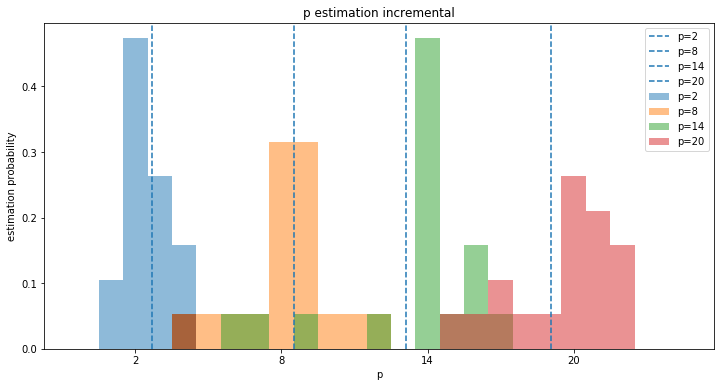

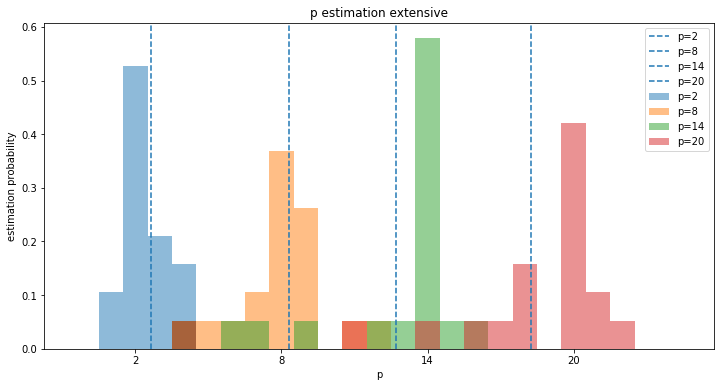

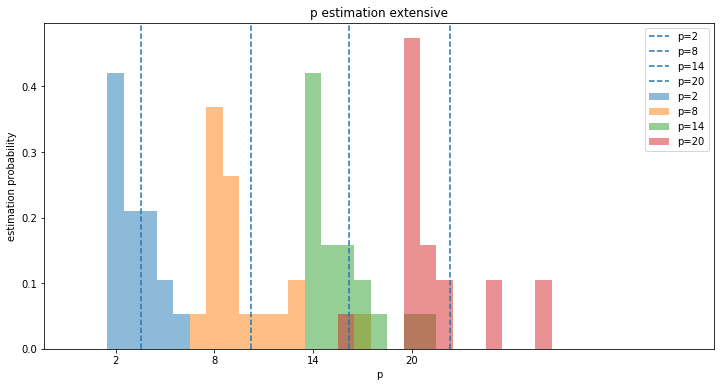

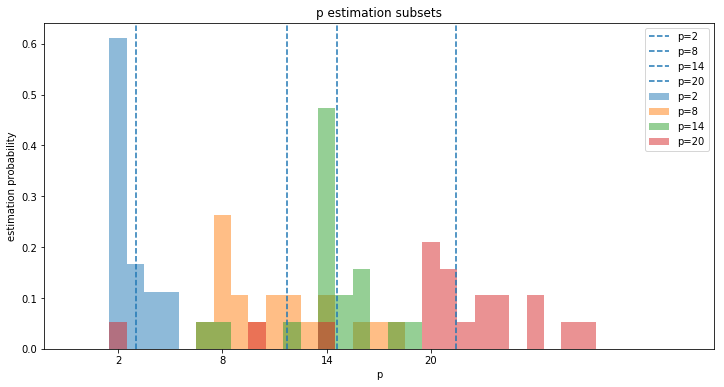

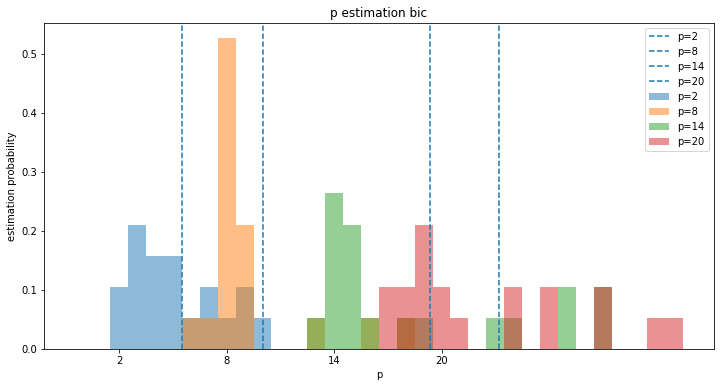

In [78]:
results = pd.read_csv('results/iterations/result.csv')
comp_results = pd.read_csv('results/iterations/comp_result.csv')
p_values=[2, 8, 14, 20]
plot_p_estimation(select_best(results, 'incremental'), 'incremental', p_values=p_values)
plot_p_estimation(select_best(results, 'extensive', patiency=1), 'extensive', p_values=p_values)
plot_p_estimation(select_best(results, 'extensive', patiency=3), 'extensive', p_values=p_values)
plot_p_estimation(select_best(results, 'subsets', patiency=5), 'subsets', p_values=p_values)
plot_p_estimation(comp_results, 'bic', p_values=p_values)

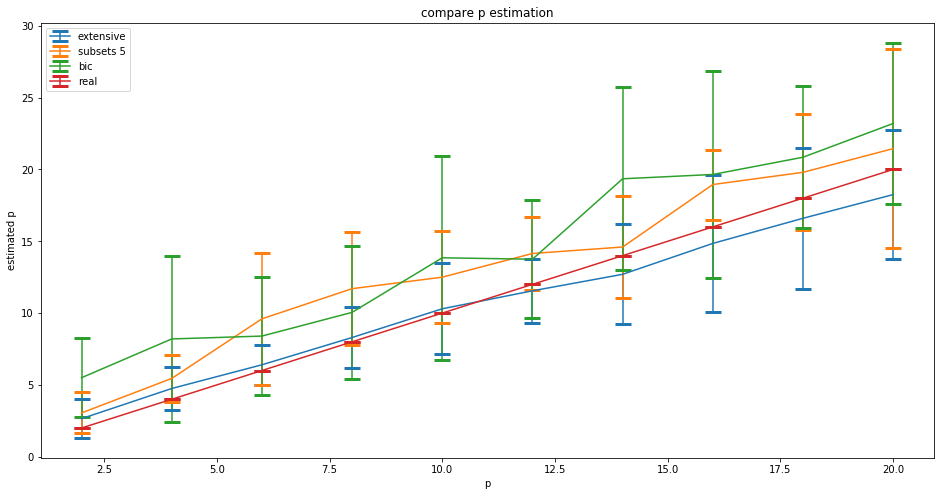

In [41]:
p_means = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['iteration p'].mean(),
           'extensive': select_best(results, 'extensive', 1).groupby('p')['iteration p'].mean(),
           'incremental': select_best(results, 'incremental', 1).groupby('p')['iteration p'].mean(),
           'bic': comp_results[comp_results['method']=='bic'].groupby('p')['iteration p'].mean(),
           'real': pd.Series(index=np.arange(2, 22, 2), data=np.arange(2, 22, 2))}
p_deviations = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['iteration p'].std(),
                'extensive': select_best(results, 'extensive', 1).groupby('p')['iteration p'].std(),
                'incremental': select_best(results, 'incremental', 1).groupby('p')['iteration p'].std(),
                'bic': comp_results[comp_results['method']=='bic'].groupby('p')['iteration p'].std(),
                'real': pd.Series(index=np.arange(2, 22, 2), data=0)}
plot_comparision(p_means, p_deviations, ['extensive', 'subsets 5', 'bic', 'real'], 'compare p estimation', 'estimated p')

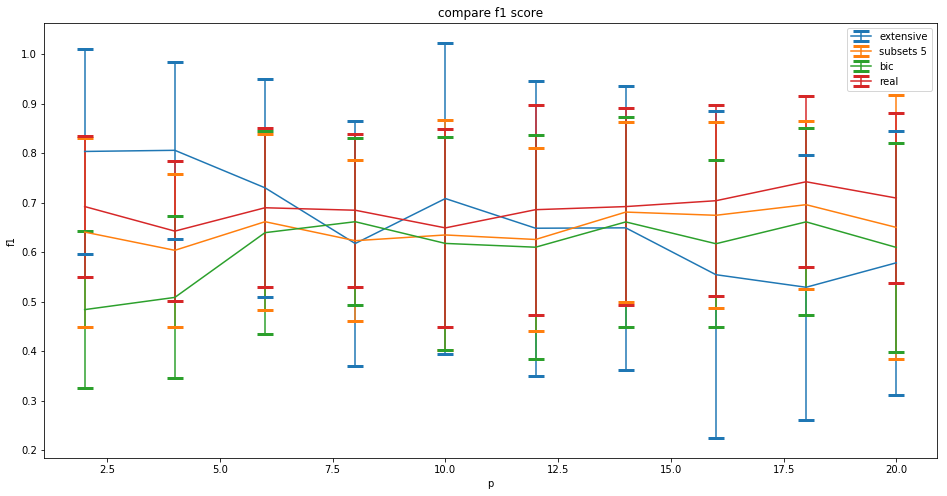

In [42]:
p_means = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['f1'].mean(),
           'extensive': select_best(results, 'extensive', 1).groupby('p')['f1'].mean(),
           'incremental': select_best(results, 'incremental', 1).groupby('p')['f1'].mean(),
           'bic': comp_results[comp_results['method']=='bic'].groupby('p')['f1'].mean(),
           'real': comp_results[comp_results['method']=='real'].groupby('p')['f1'].mean()}
p_deviations = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['f1'].std(),
                'extensive': select_best(results, 'extensive', 1).groupby('p')['f1'].std(),
                'incremental': select_best(results, 'incremental', 1).groupby('p')['f1'].std(),
                'bic': comp_results[comp_results['method']=='bic'].groupby('p')['f1'].std(),
                'real': comp_results[comp_results['method']=='real'].groupby('p')['f1'].std()}
plot_comparision(p_means, p_deviations, ['extensive', 'subsets 5', 'bic', 'real'], 'compare f1 score', 'f1')

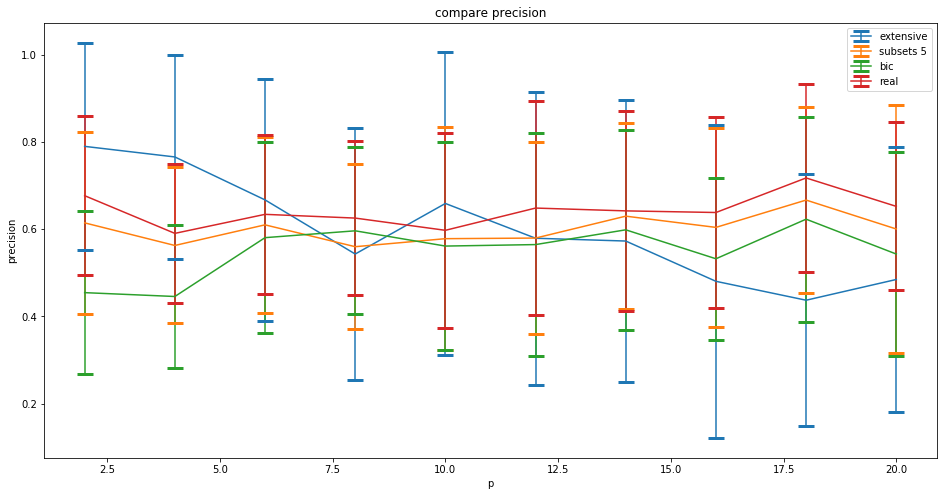

In [33]:
p_means = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['precision'].mean(),
           'extensive': select_best(results, 'extensive', 1).groupby('p')['precision'].mean(),
           'incremental': select_best(results, 'incremental', 1).groupby('p')['precision'].mean(),
           'bic': comp_results[comp_results['method']=='bic'].groupby('p')['precision'].mean(),
           'real': comp_results[comp_results['method']=='real'].groupby('p')['precision'].mean()}
p_deviations = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['precision'].std(),
                'extensive': select_best(results, 'extensive', 1).groupby('p')['precision'].std(),
                'incremental': select_best(results, 'incremental', 1).groupby('p')['precision'].std(),
                'bic': comp_results[comp_results['method']=='bic'].groupby('p')['precision'].std(),
                'real': comp_results[comp_results['method']=='real'].groupby('p')['precision'].std()}
plot_comparision(p_means, p_deviations, ['extensive', 'subsets 5', 'bic', 'real'], 'compare precision', 'precision')

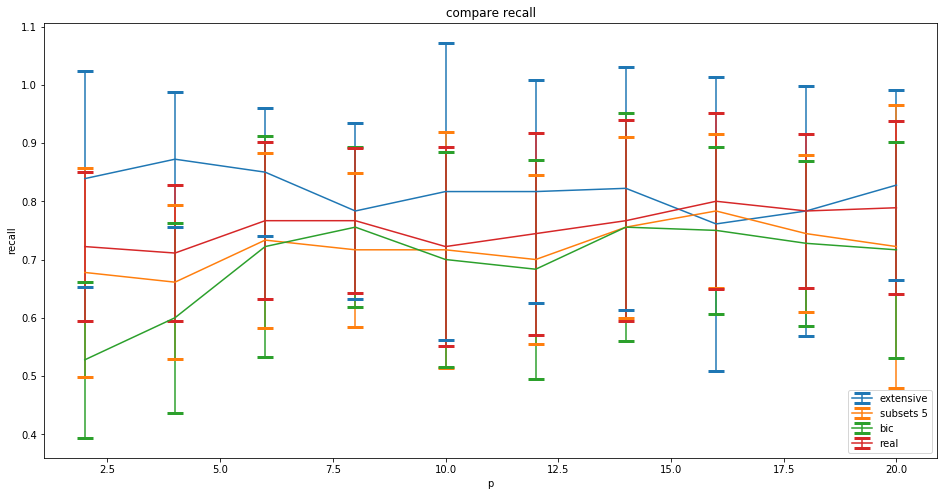

In [34]:
p_means = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['recall'].mean(),
           'extensive': select_best(results, 'extensive', 1).groupby('p')['recall'].mean(),
           'incremental': select_best(results, 'incremental', 1).groupby('p')['recall'].mean(),
           'bic': comp_results[comp_results['method']=='bic'].groupby('p')['recall'].mean(),
           'real': comp_results[comp_results['method']=='real'].groupby('p')['recall'].mean()}
p_deviations = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['recall'].std(),
                'extensive': select_best(results, 'extensive', 1).groupby('p')['recall'].std(),
                'incremental': select_best(results, 'incremental', 1).groupby('p')['recall'].std(),
                'bic': comp_results[comp_results['method']=='bic'].groupby('p')['recall'].std(),
                'real': comp_results[comp_results['method']=='real'].groupby('p')['recall'].std()}
plot_comparision(p_means, p_deviations, ['extensive', 'subsets 5', 'bic', 'real'], 'compare recall', 'recall')

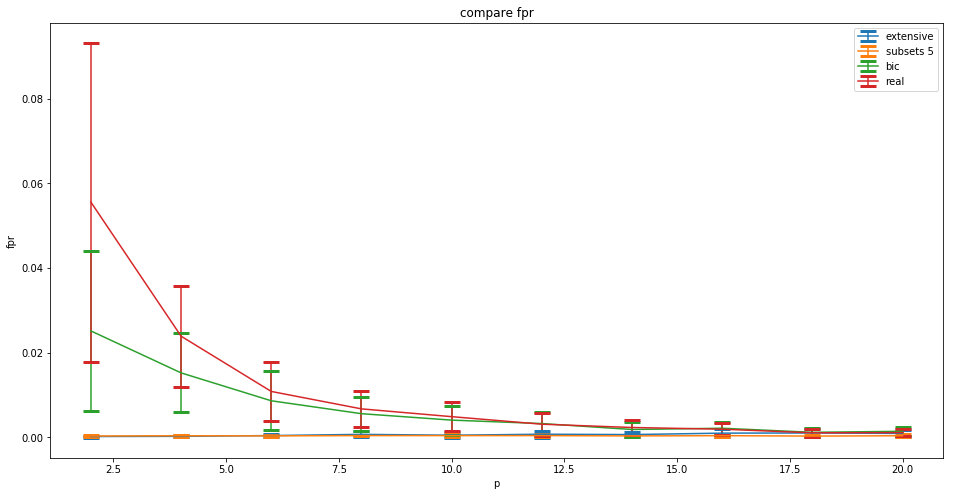

In [35]:
p_means = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['fpr'].mean(),
           'extensive': select_best(results, 'extensive', 1).groupby('p')['fpr'].mean(),
           'incremental': select_best(results, 'incremental', 1).groupby('p')['fpr'].mean(),
           'bic': comp_results[comp_results['method']=='bic'].groupby('p')['fpr'].mean(),
           'real': comp_results[comp_results['method']=='real'].groupby('p')['fpr'].mean()}
p_deviations = {'subsets 5': select_best(results, 'subsets', 5).groupby('p')['fpr'].std(),
                'extensive': select_best(results, 'extensive', 1).groupby('p')['fpr'].std(),
                'incremental': select_best(results, 'incremental', 1).groupby('p')['fpr'].std(),
                'bic': comp_results[comp_results['method']=='bic'].groupby('p')['fpr'].std(),
                'real': comp_results[comp_results['method']=='real'].groupby('p')['fpr'].std()}
plot_comparision(p_means, p_deviations, ['extensive', 'subsets 5', 'bic', 'real'], 'compare fpr', 'fpr')

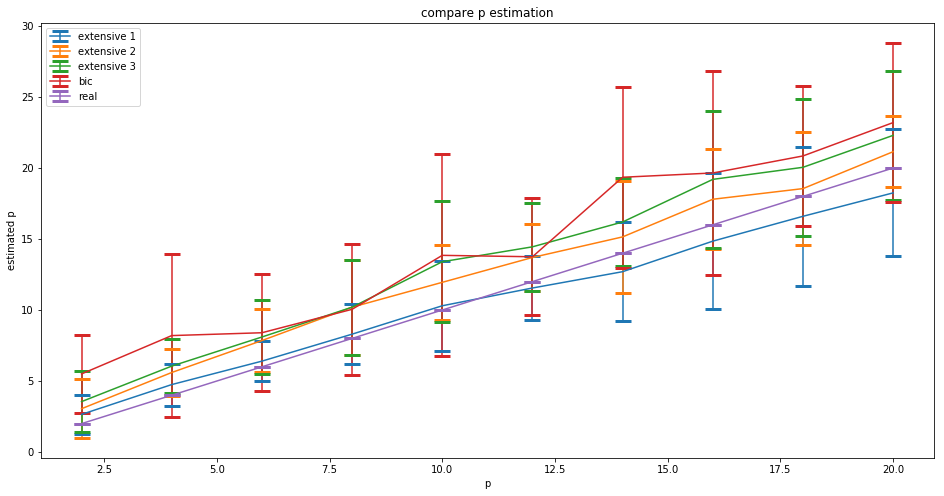

In [45]:
p_means = {'extensive 1': select_best(results, 'extensive', 1).groupby('p')['iteration p'].mean(),
           'extensive 2': select_best(results, 'extensive', 2).groupby('p')['iteration p'].mean(),
           'extensive 3': select_best(results, 'extensive', 3).groupby('p')['iteration p'].mean(),
           'bic': comp_results[comp_results['method']=='bic'].groupby('p')['iteration p'].mean(),
           'real': pd.Series(index=np.arange(2, 22, 2), data=np.arange(2, 22, 2))}
p_deviations = {'extensive 1': select_best(results, 'extensive', 1).groupby('p')['iteration p'].std(),
                'extensive 2': select_best(results, 'extensive', 2).groupby('p')['iteration p'].std(),
                'extensive 3': select_best(results, 'extensive', 3).groupby('p')['iteration p'].std(),
                'bic': comp_results[comp_results['method']=='bic'].groupby('p')['iteration p'].std(),
                'real': pd.Series(index=np.arange(2, 22, 2), data=0)}
plot_comparision(p_means, p_deviations, ['extensive 1', 'extensive 2', 'extensive 3', 'bic', 'real'],
                 'compare p estimation', 'estimated p')

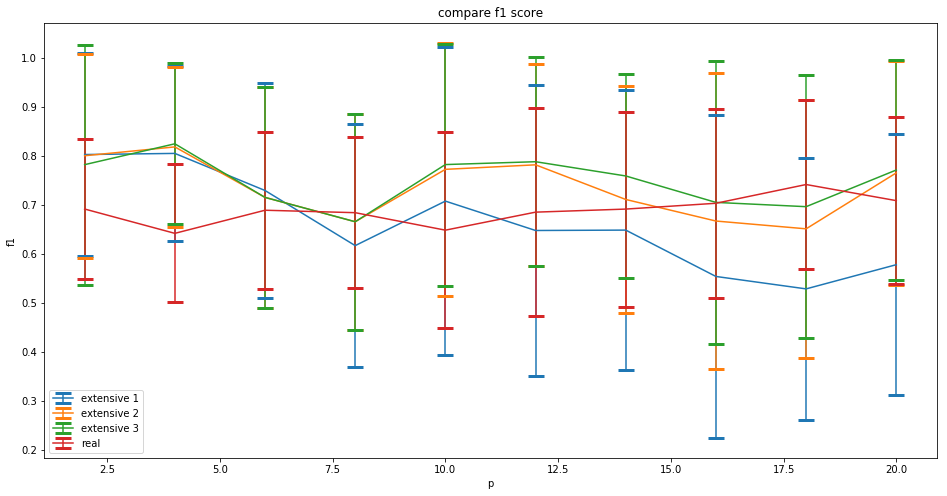

In [48]:
p_means = {'extensive 1': select_best(results, 'extensive', 1).groupby('p')['f1'].mean(),
           'extensive 2': select_best(results, 'extensive', 2).groupby('p')['f1'].mean(),
           'extensive 3': select_best(results, 'extensive', 3).groupby('p')['f1'].mean(),
           'real': comp_results[comp_results['method']=='real'].groupby('p')['f1'].mean()}
p_deviations = {'extensive 1': select_best(results, 'extensive', 1).groupby('p')['f1'].std(),
                'extensive 2': select_best(results, 'extensive', 2).groupby('p')['f1'].std(),
                'extensive 3': select_best(results, 'extensive', 3).groupby('p')['f1'].std(),
                'real': comp_results[comp_results['method']=='real'].groupby('p')['f1'].std()}
plot_comparision(p_means, p_deviations, ['extensive 1', 'extensive 2', 'extensive 3', 'real'],
                 'compare f1 score', 'f1')

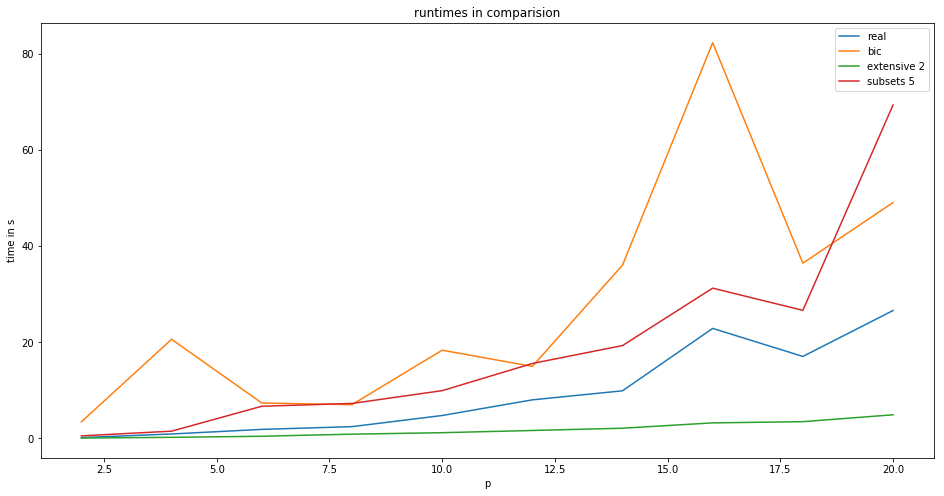

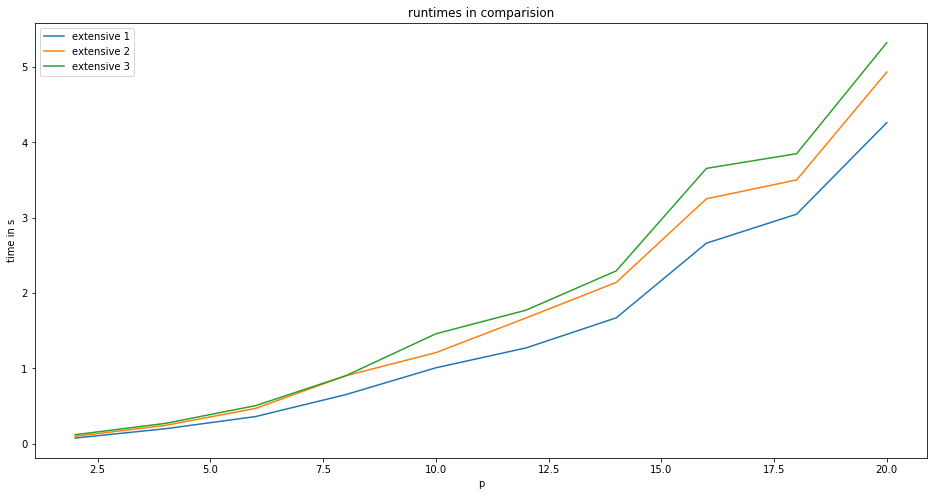

In [77]:
mean_runtime = {'extensive 1': results_runtime(results, 'extensive', 1).groupby(['p'])['runtime'].mean(),
                'extensive 2': results_runtime(results, 'extensive', 2).groupby(['p'])['runtime'].mean(),
                'extensive 3': results_runtime(results, 'extensive', 3).groupby(['p'])['runtime'].mean(),
                'incremental': results_runtime(results, 'incremental', 1).groupby(['p'])['runtime'].mean(),
                'subsets 5': results_runtime(results, 'subsets', 5).groupby(['p'])['runtime'].mean(),
                'real': comp_results[comp_results['method']=='real'].groupby(['p'])['time'].mean(),
                'bic': comp_results[comp_results['method']=='bic'].groupby(['p'])['time'].mean()}

plot_comparision(mean_runtime, None, ['real', 'bic', 'extensive 2', 'subsets 5'],
                 'runtimes in comparision', 'time in s', error_plt=False)
plot_comparision(mean_runtime, None, ['extensive 1', 'extensive 2', 'extensive 3'],
                 'runtimes in comparision', 'time in s', error_plt=False)